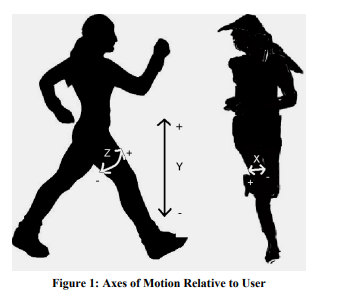

# import modules

In [1]:
# import local library
import sys
sys.path.append('../')
from lib.preprocess import load_data
from lib.local_utils import n_plot_activity, plot_activity
import copy
import numpy as np
from scipy.fft import fft, ifft

/home/nakagawaren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# load data

In [2]:
# Same labels will be reused throughout the program
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3
# Define column name of the label vector
LABEL = "ActivityEncoded"
# set random seed
SEED = 314

SAMPLING_RATE = 20

x_train, x_test, y_train, y_test = load_data(
    LABELS, TIME_PERIODS, STEP_DISTANCE, LABEL, N_FEATURES, SEED, datadir='../data/'
)

Loading data...
Data loaded.


In [15]:
import pandas as pd
pd.concat([y_train, y_test]).value_counts()

19217.0

In [3]:
idx = 1

In [4]:
LABELS[np.argmax(y_train[idx])]

'Walking'

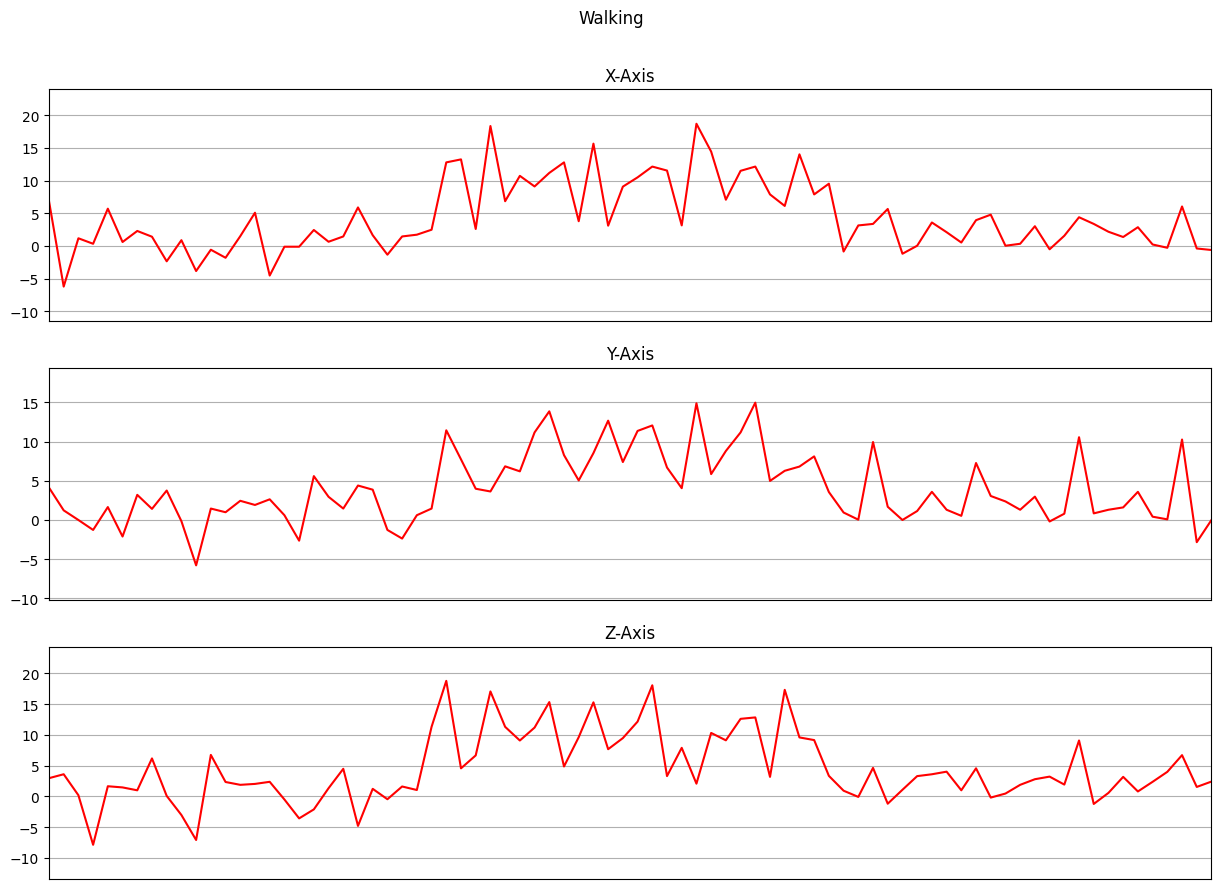

In [5]:
plot_activity(LABELS[np.argmax(y_train[idx])], x_train[idx])

# define functions

In [6]:
def absoulte(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(len(inputs)):
        outputs[i] = np.sqrt(np.sum(np.square(inputs[i])))
    return outputs[:,0]

def low_pass_filter(data, cutoff_frequency=SAMPLING_RATE*2):
    inputs = copy.deepcopy(data)
    fft_signal = fft(inputs)
    frequencies = np.fft.fftfreq(len(inputs), 1 / SAMPLING_RATE)
    fft_signal[np.abs(frequencies) > cutoff_frequency] = 0
    return ifft(fft_signal).real

def gaussian_filter(data, sigma=1.5, k=5):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    w = np.exp(-np.square(np.arange(-k,k+1))/(2*sigma*sigma))
    for j in range(3):
        outputs[:,j] = np.convolve(np.pad(inputs[:,j], (k,k), 'edge'), w, mode='valid')
    return outputs

def median_filter(data, k=3):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for j in range(3):
        for kernel in range(k, len(inputs)-k):
            outputs[kernel,j] = np.median(inputs[kernel-k:kernel+k+1,j])
    return outputs

def difference(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (inputs[i] - inputs[i-1])
    return outputs

def differential(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (inputs[i] - inputs[i-1]) * SAMPLING_RATE
    return outputs

def integral(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    outputs[0] = 0
    for i in range(1, len(inputs)):
        outputs[i] = (outputs[i-1] + inputs[i]) / SAMPLING_RATE
    return outputs

# absolute

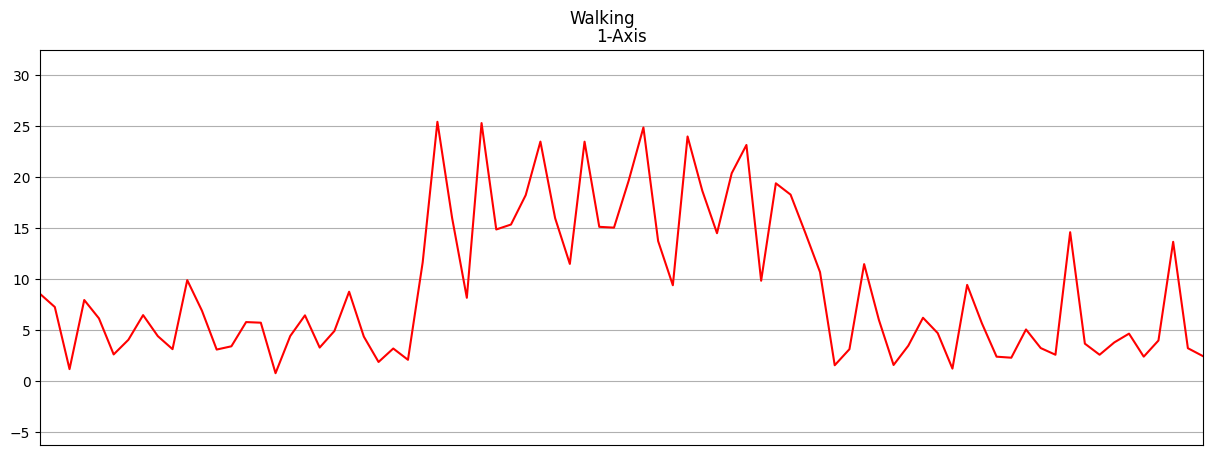

In [7]:
n_plot_activity(LABELS[np.argmax(y_train[idx])], absoulte(x_train[idx]))

# difference

In [8]:
sum_of_difference = dict(zip(["x","y","z"],sum(difference(x_train[idx]))))
for k, v in sum_of_difference.items():
    print(f"{k}: {v}")

x: -7.502912998199463
y: -4.1399993896484375
z: -0.549195408821106


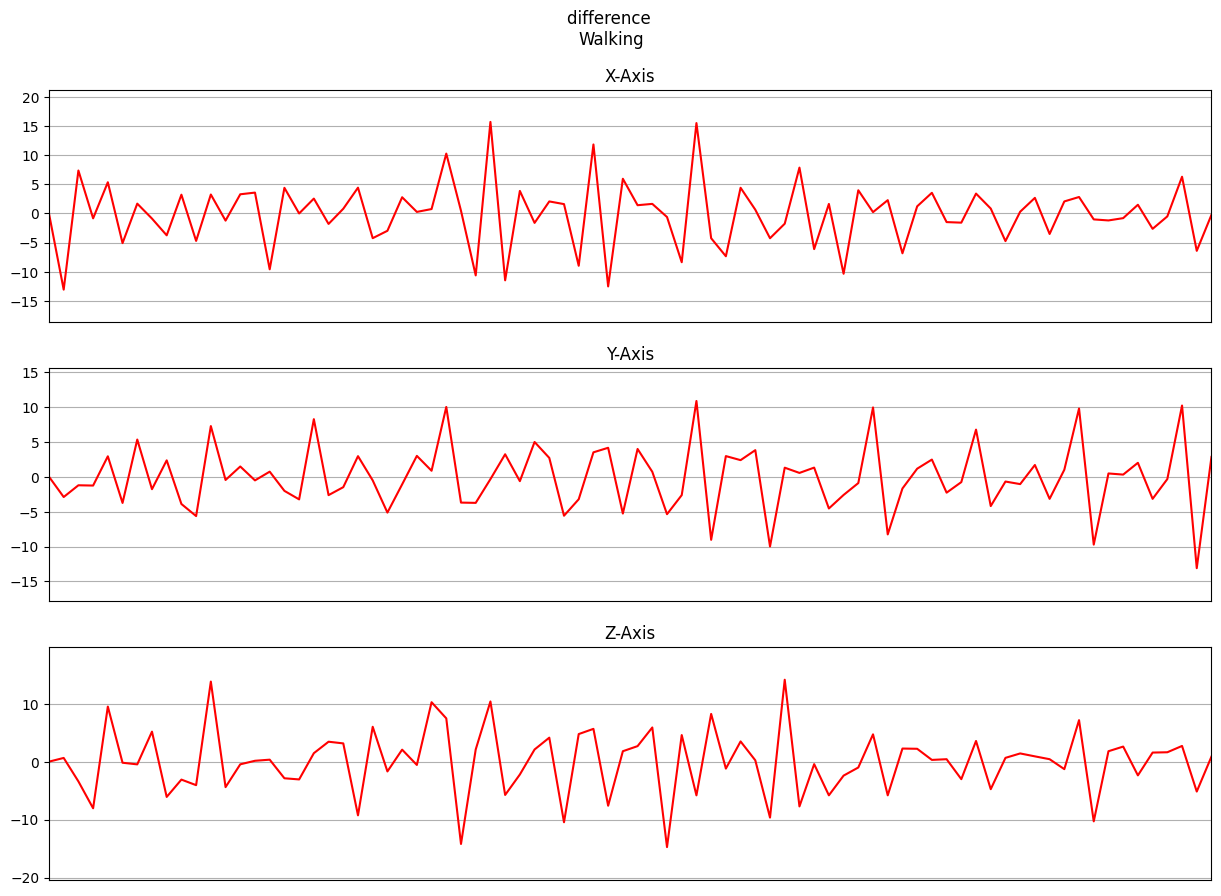

In [9]:
plot_activity(f"difference \n{LABELS[np.argmax(y_train[idx])]}", difference(x_train[idx]))

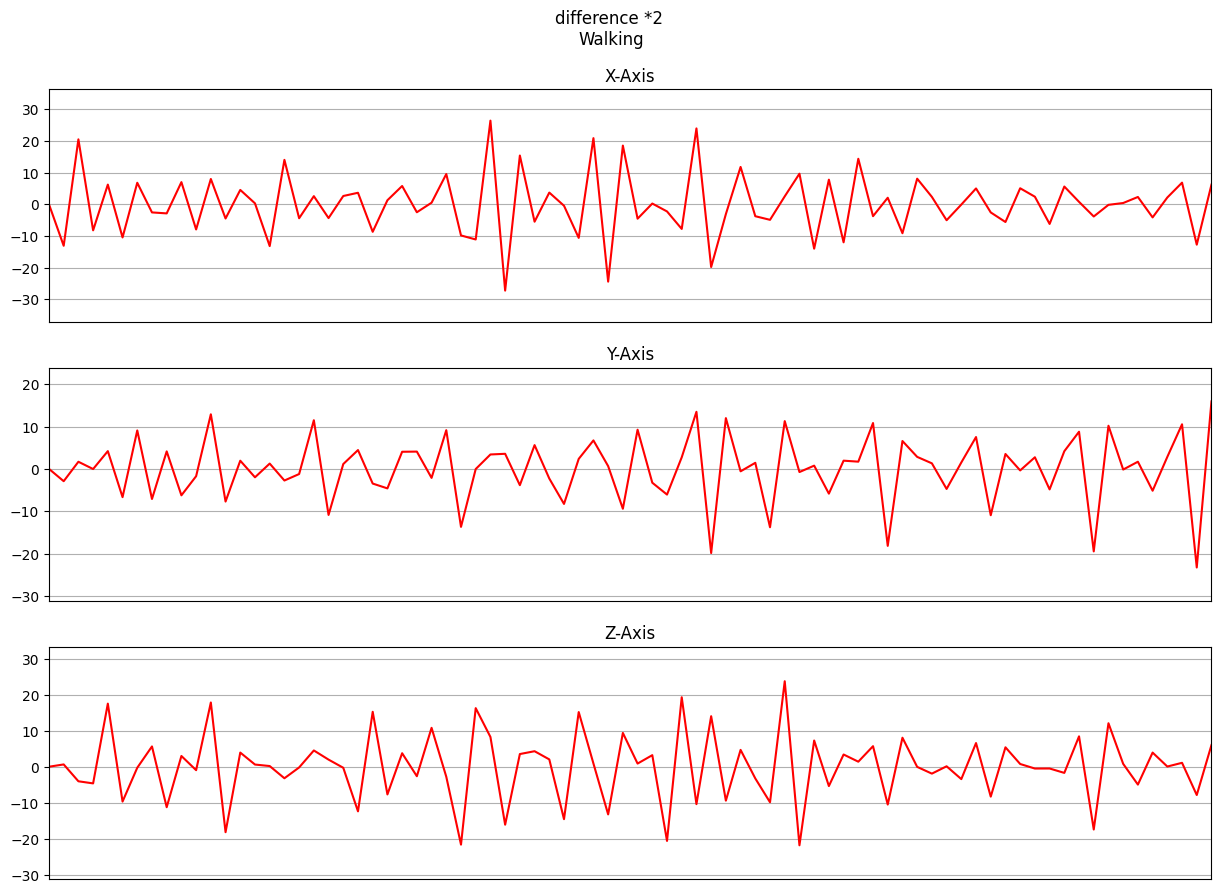

In [10]:
plot_activity(f"difference *2 \n{LABELS[np.argmax(y_train[idx])]}", difference(difference(x_train[idx])))

# differential

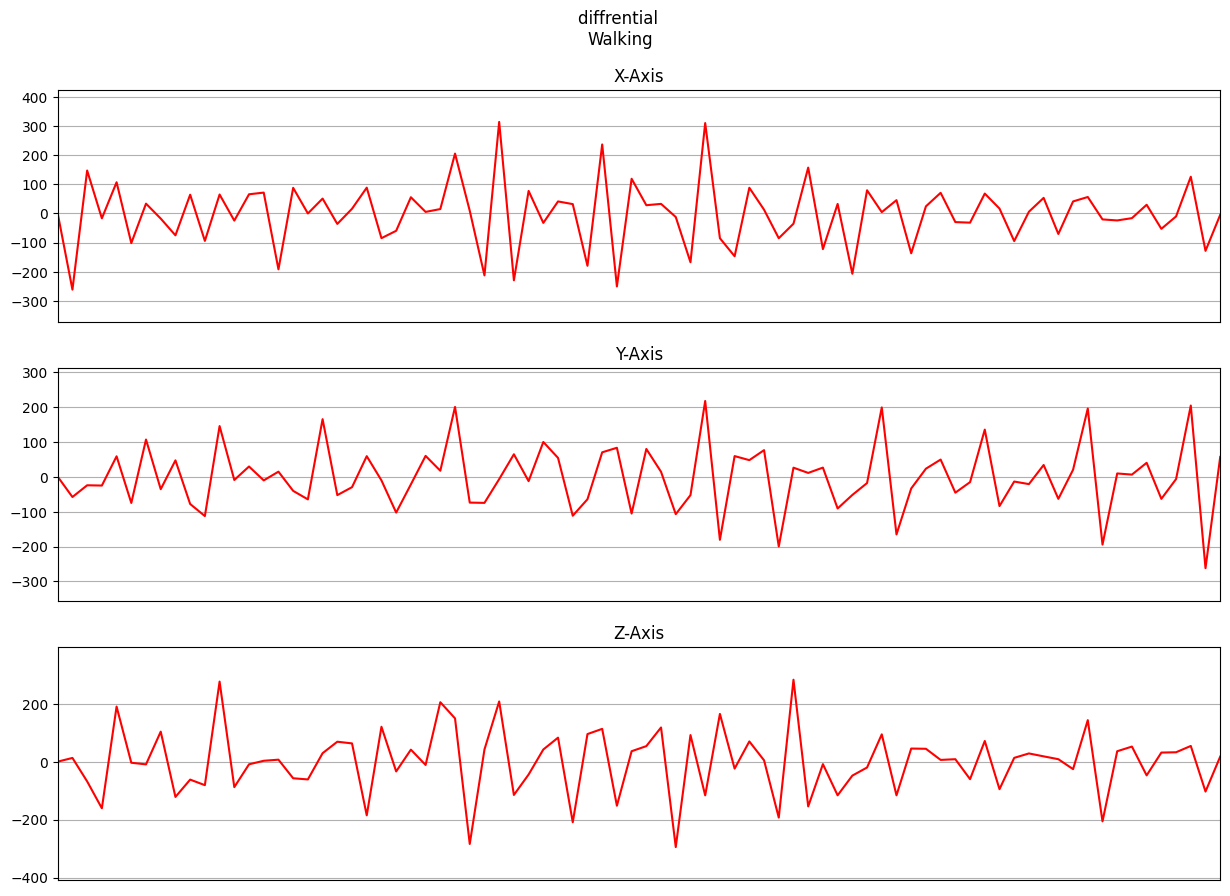

In [11]:
plot_activity(f"diffrential \n{LABELS[np.argmax(y_train[idx])]}", differential(x_train[idx]))

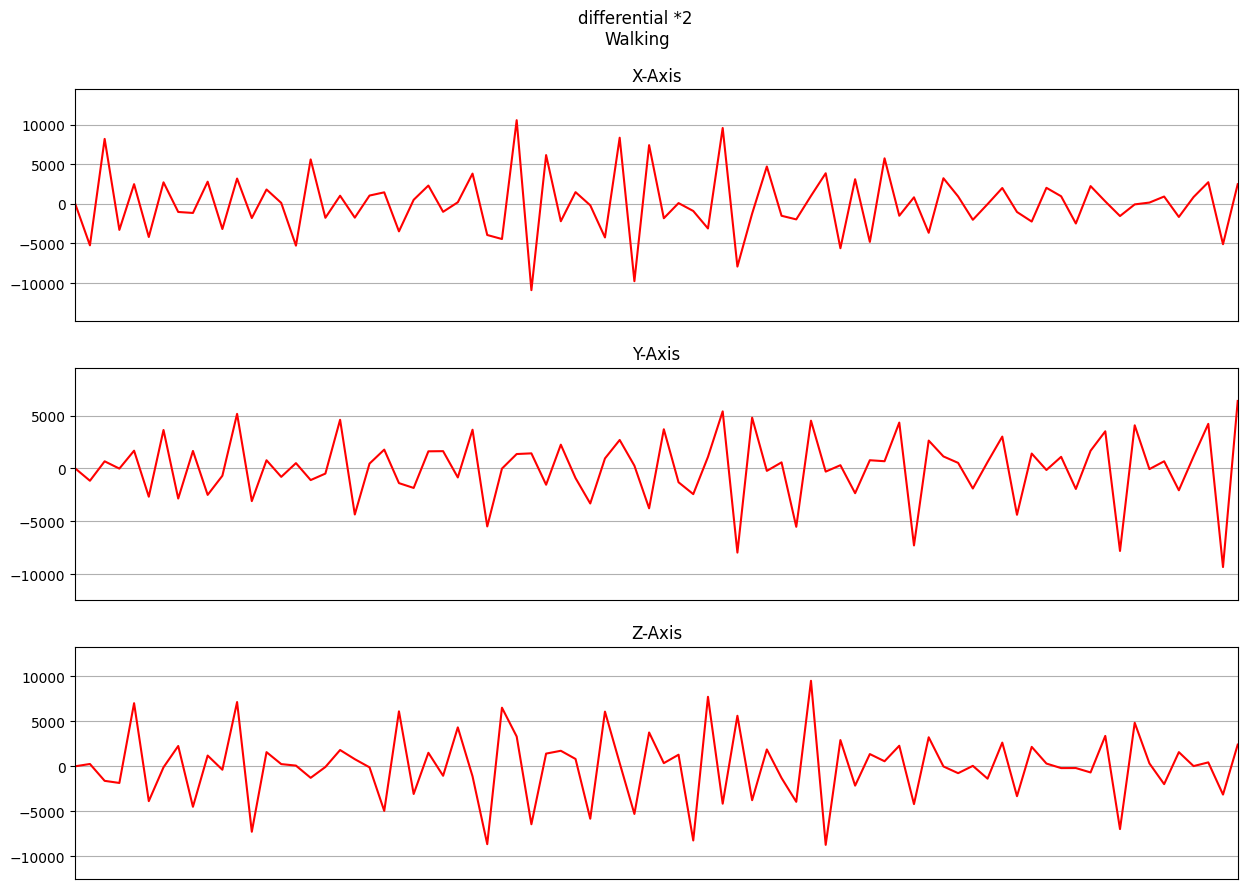

In [12]:
plot_activity(f"differential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(x_train[idx])))

# fileter

## fft low-pass filter

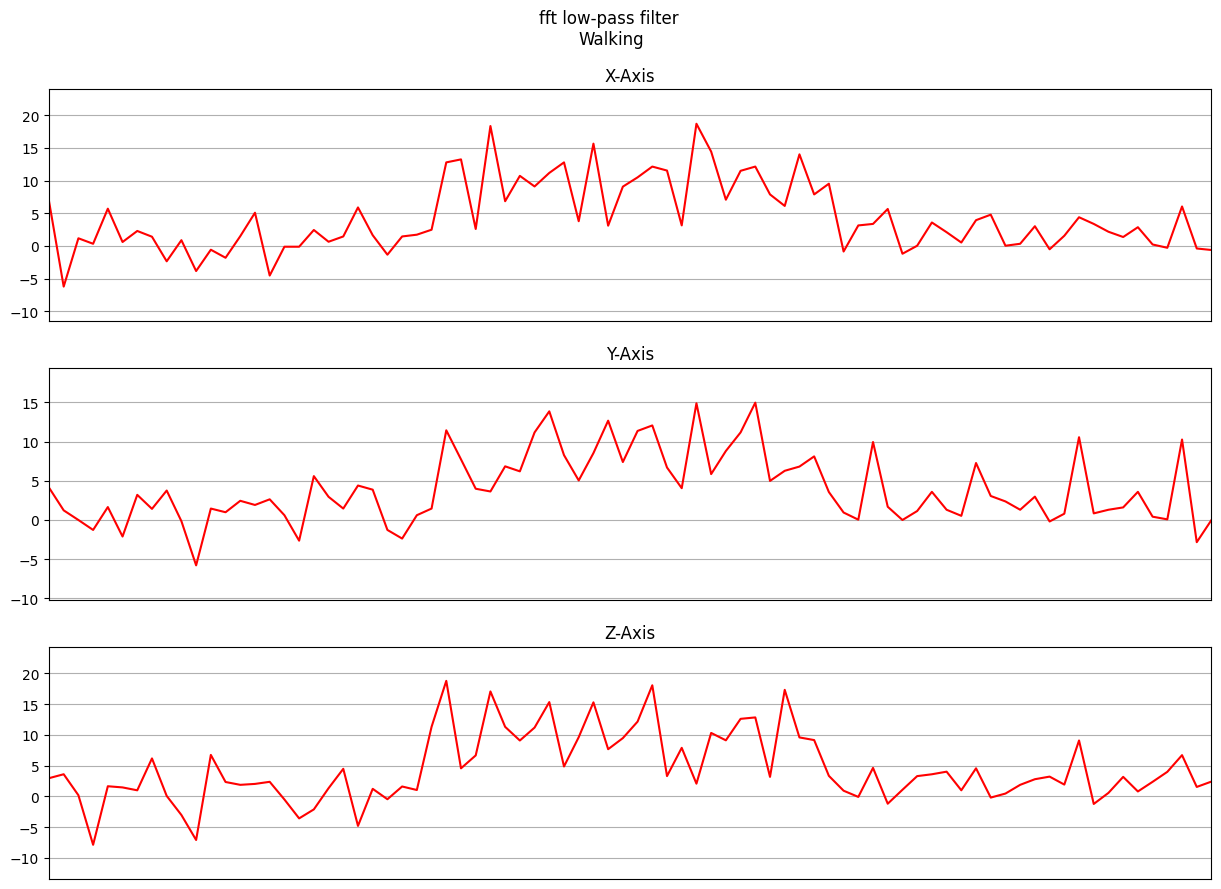

In [13]:
plot_activity(f"fft low-pass filter \n{LABELS[np.argmax(y_train[idx])]}", low_pass_filter(x_train[idx]))

## gaussian filter

In [14]:
gaussian_sigma = 1
gaussian_k = 3

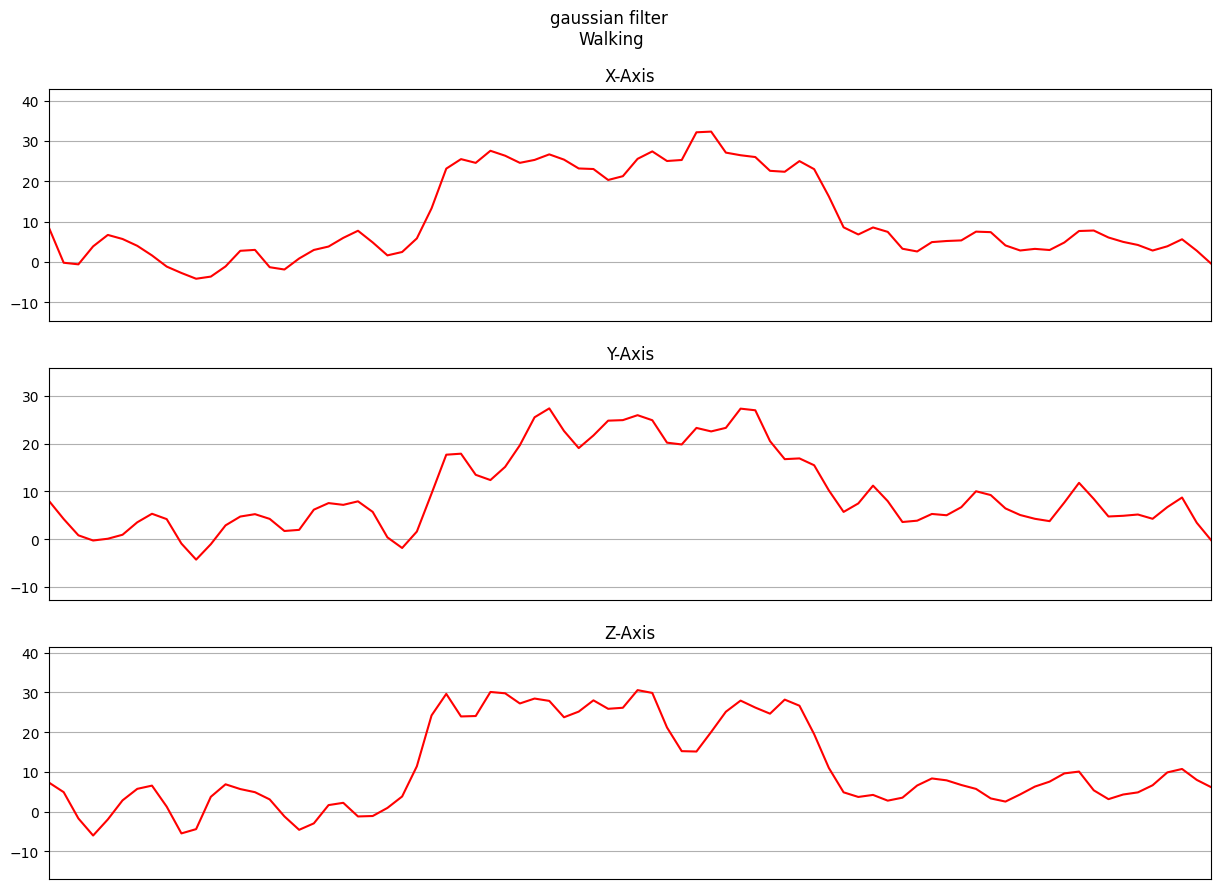

In [15]:
plot_activity(f"gaussian filter \n{LABELS[np.argmax(y_train[idx])]}", gaussian_filter(x_train[idx],sigma=gaussian_sigma,k=gaussian_k))

## median filter

In [16]:
median_k = 3

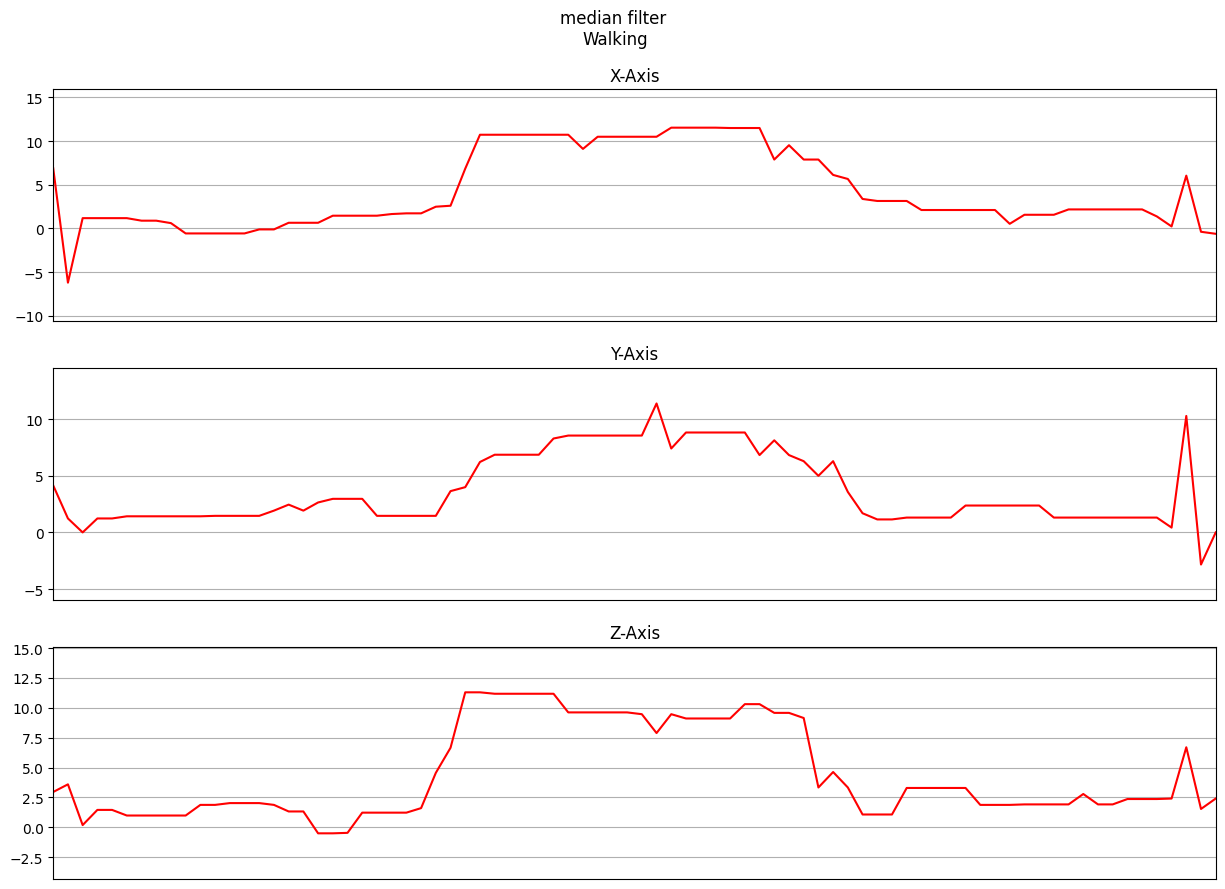

In [17]:
plot_activity(f"median filter \n{LABELS[np.argmax(y_train[idx])]}", median_filter(x_train[idx], k=median_k))

# filtered differential

## fft low-pass filtered differential

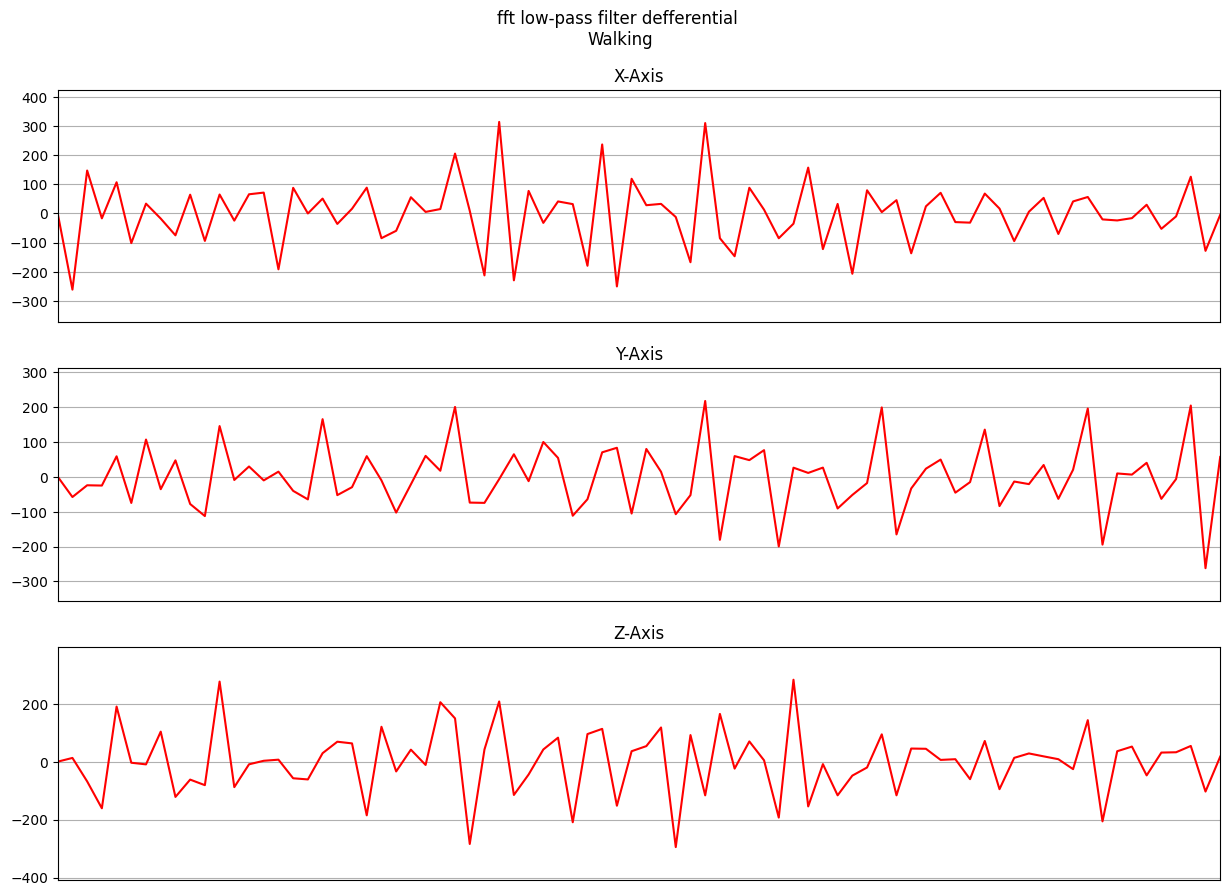

In [18]:
plot_activity(f"fft low-pass filter defferential \n{LABELS[np.argmax(y_train[idx])]}", differential(low_pass_filter(x_train[idx])))

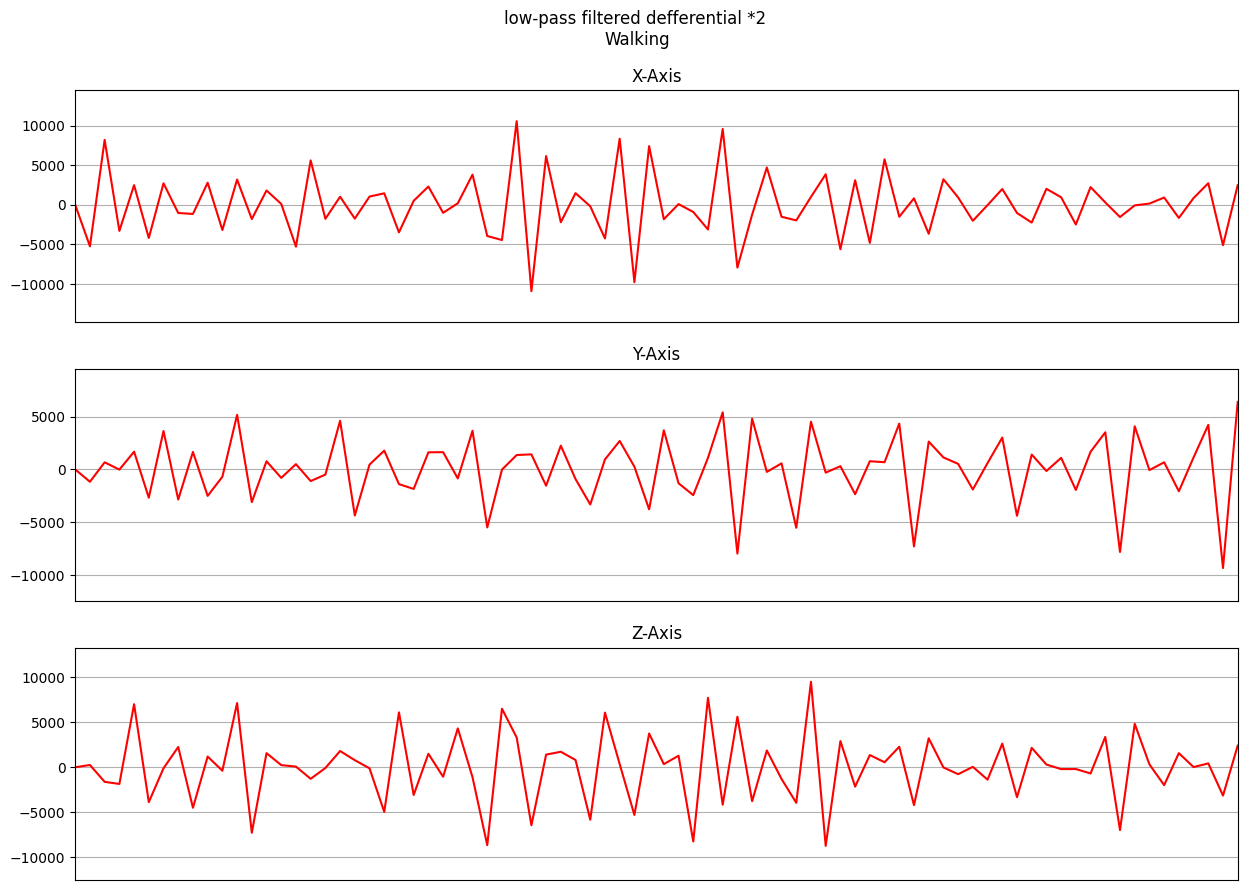

In [19]:
plot_activity(f"low-pass filtered defferential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(low_pass_filter(x_train[idx]))))

## gaussian filtered differential

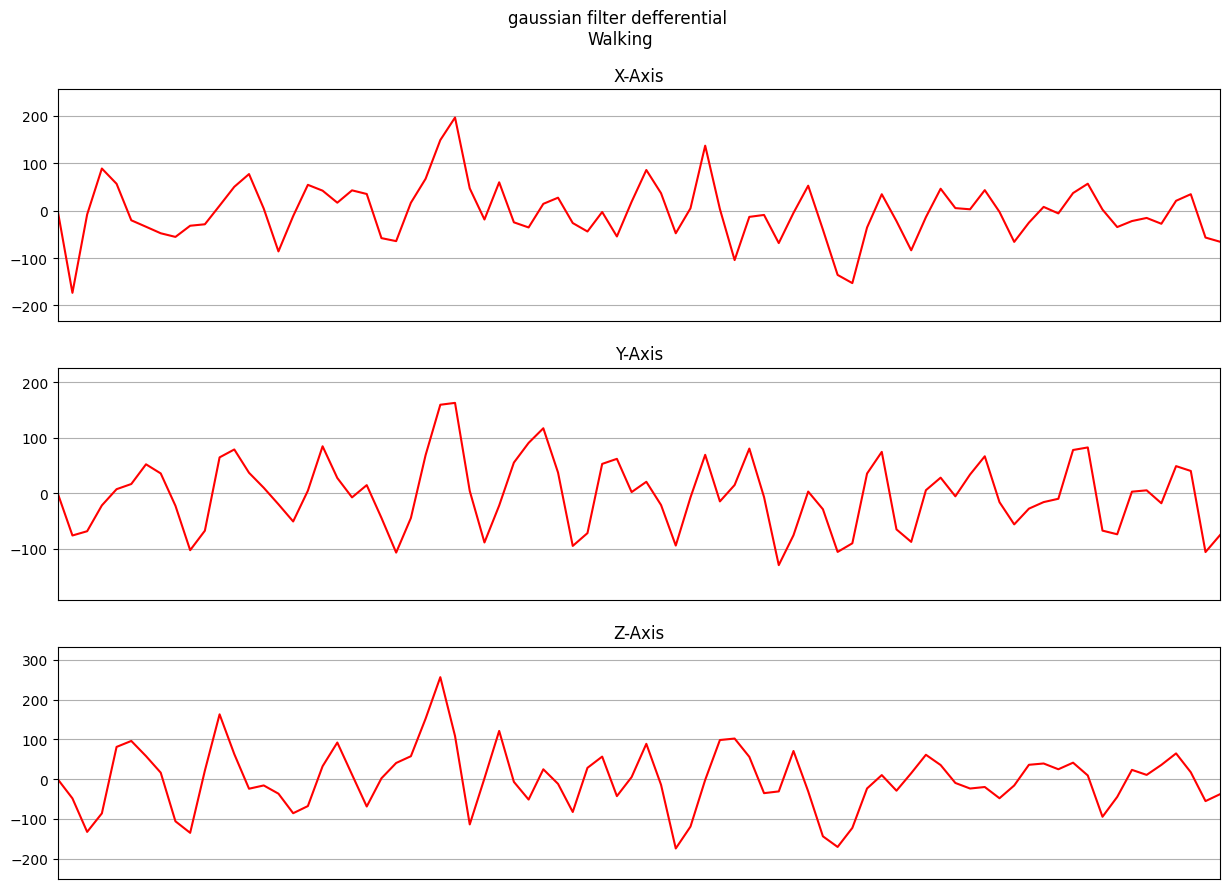

In [20]:
plot_activity(f"gaussian filter defferential \n{LABELS[np.argmax(y_train[idx])]}", differential(gaussian_filter(x_train[idx],sigma=gaussian_sigma,k=gaussian_k)))

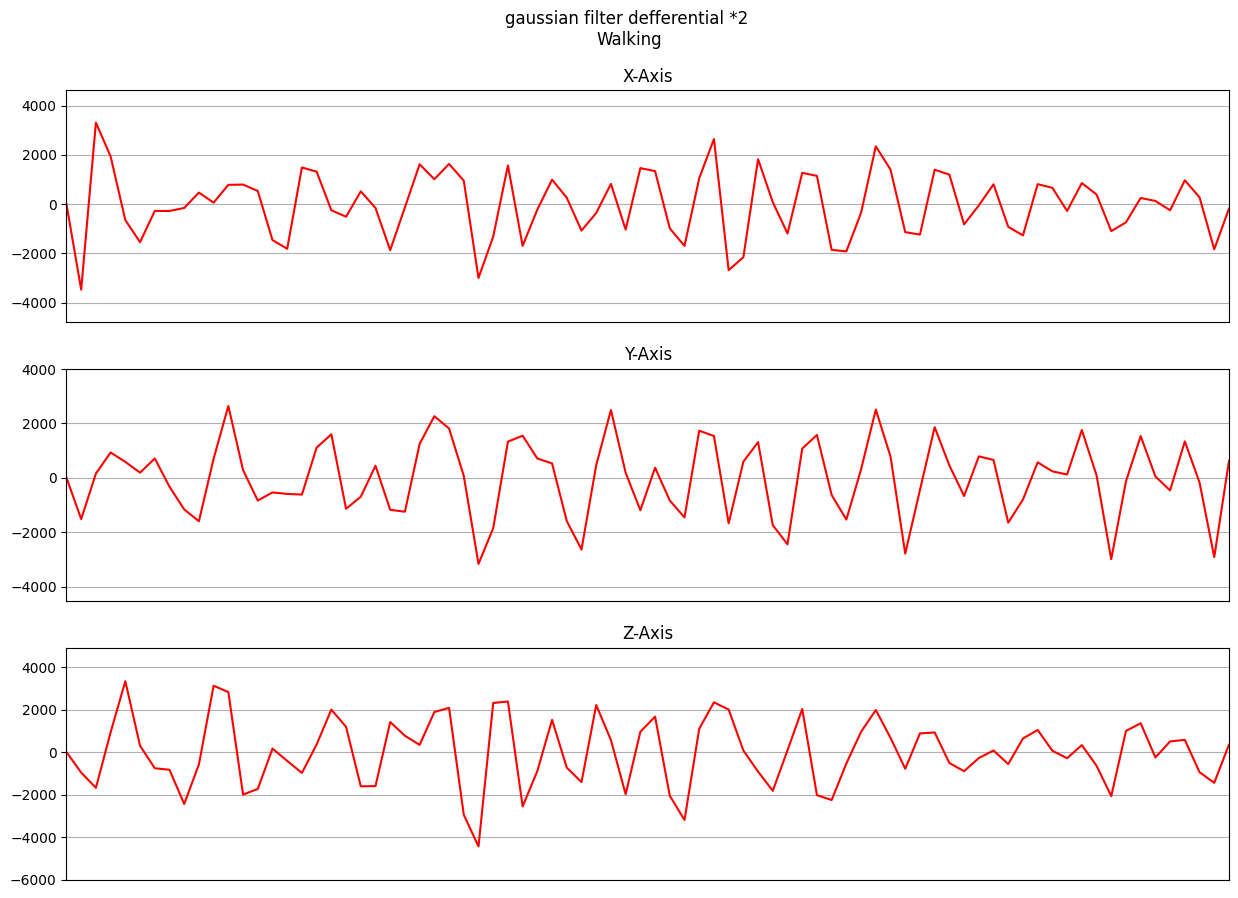

In [21]:
plot_activity(f"gaussian filter defferential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(gaussian_filter(x_train[idx],sigma=gaussian_sigma,k=gaussian_k))))

## median filtered differential

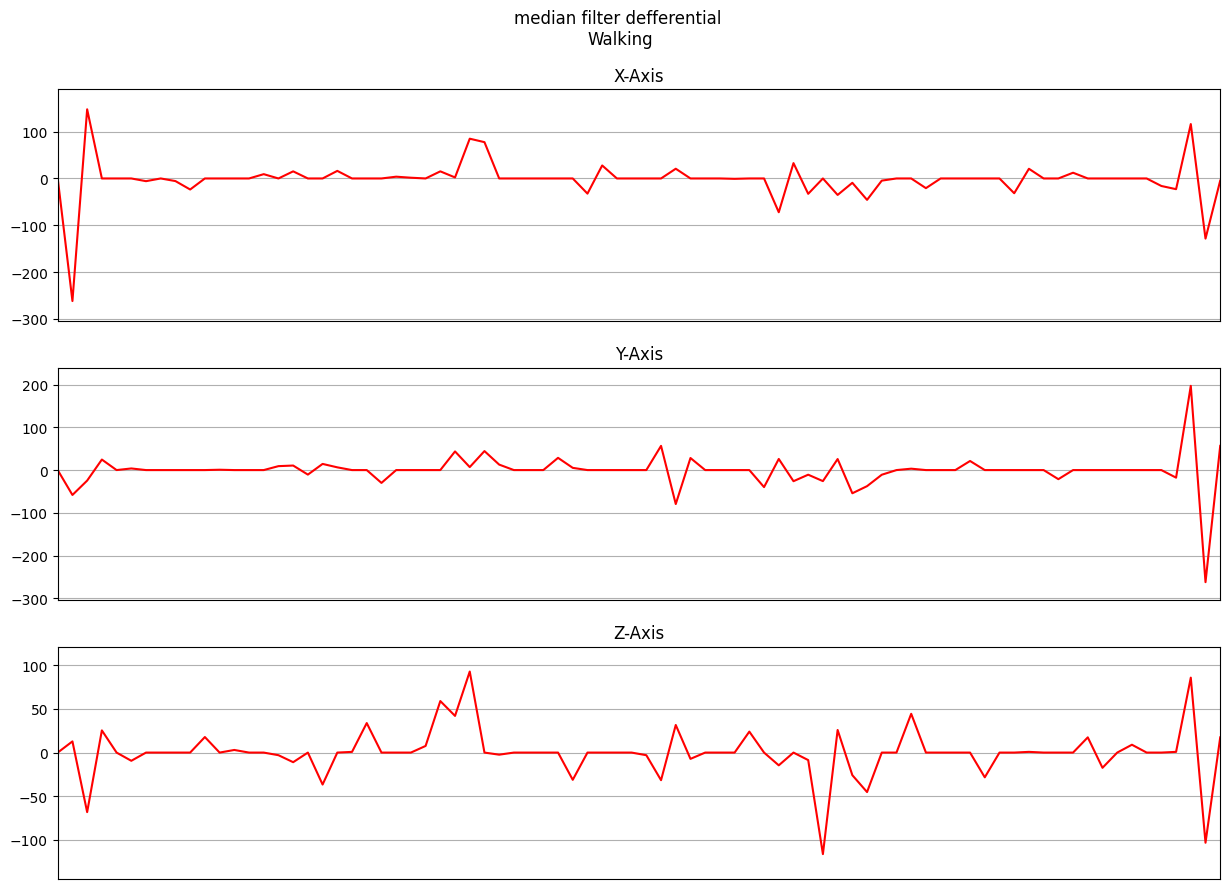

In [22]:
plot_activity(f"median filter defferential \n{LABELS[np.argmax(y_train[idx])]}", differential(median_filter(x_train[idx],k=median_k)))

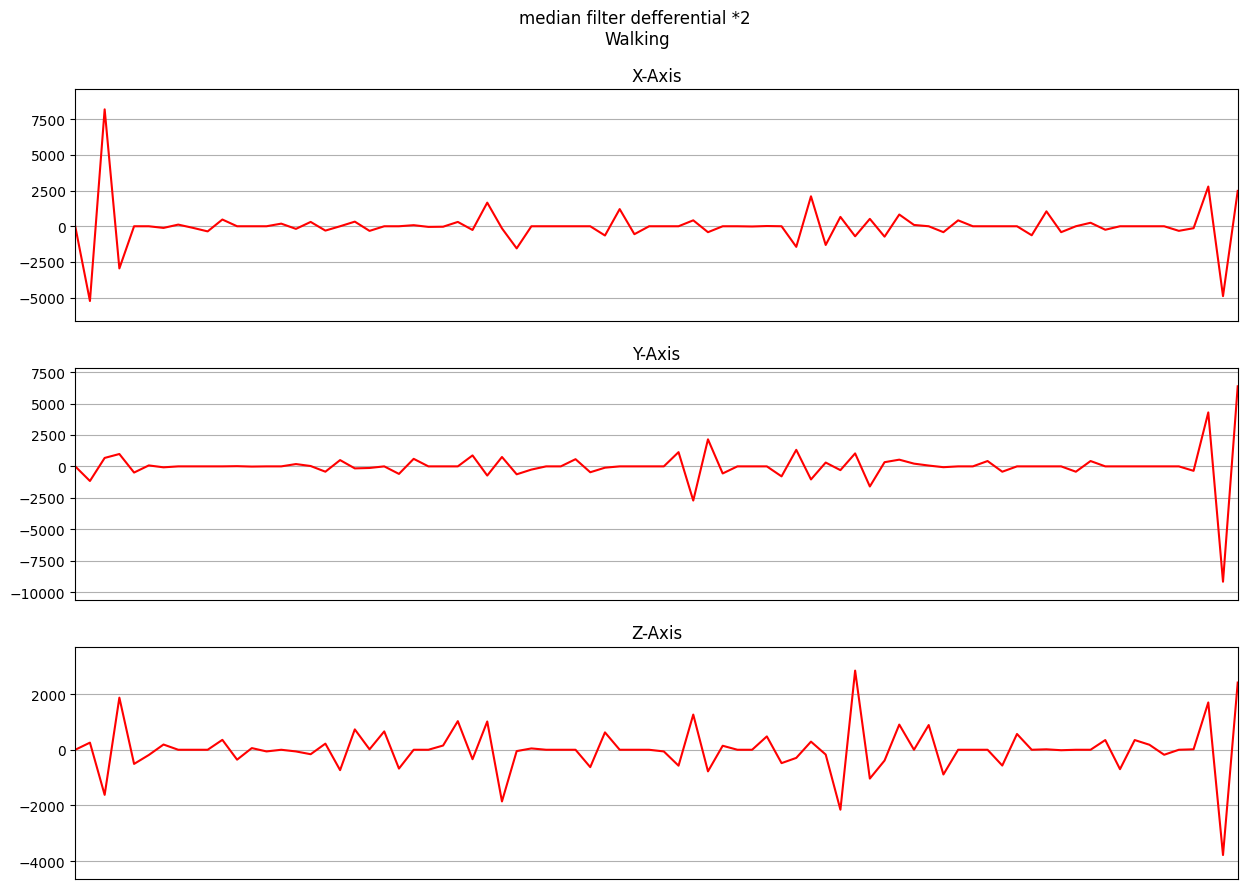

In [23]:
plot_activity(f"median filter defferential *2 \n{LABELS[np.argmax(y_train[idx])]}", differential(differential(median_filter(x_train[idx],k=median_k))))

# integral

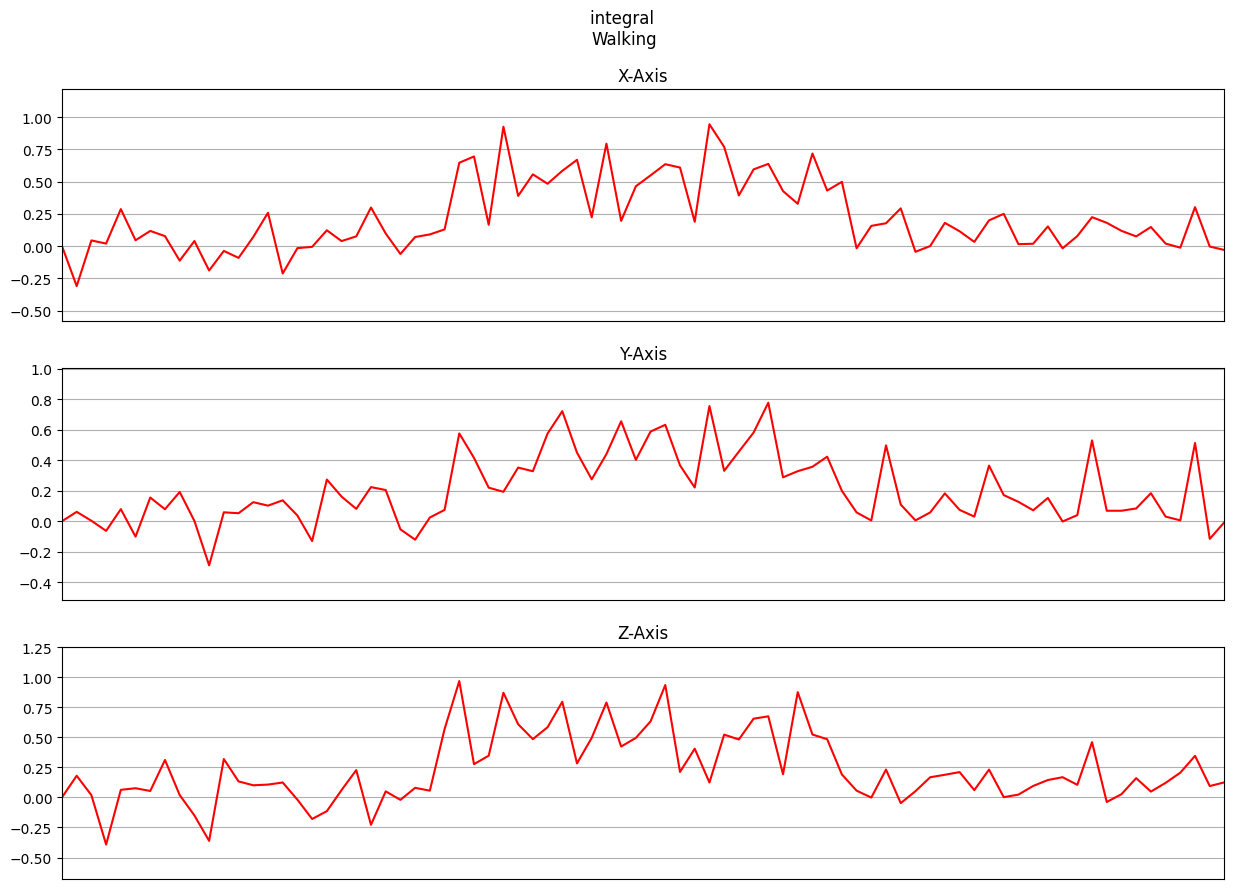

In [24]:
plot_activity(f"integral \n{LABELS[np.argmax(y_train[idx])]}", integral(x_train[idx]))

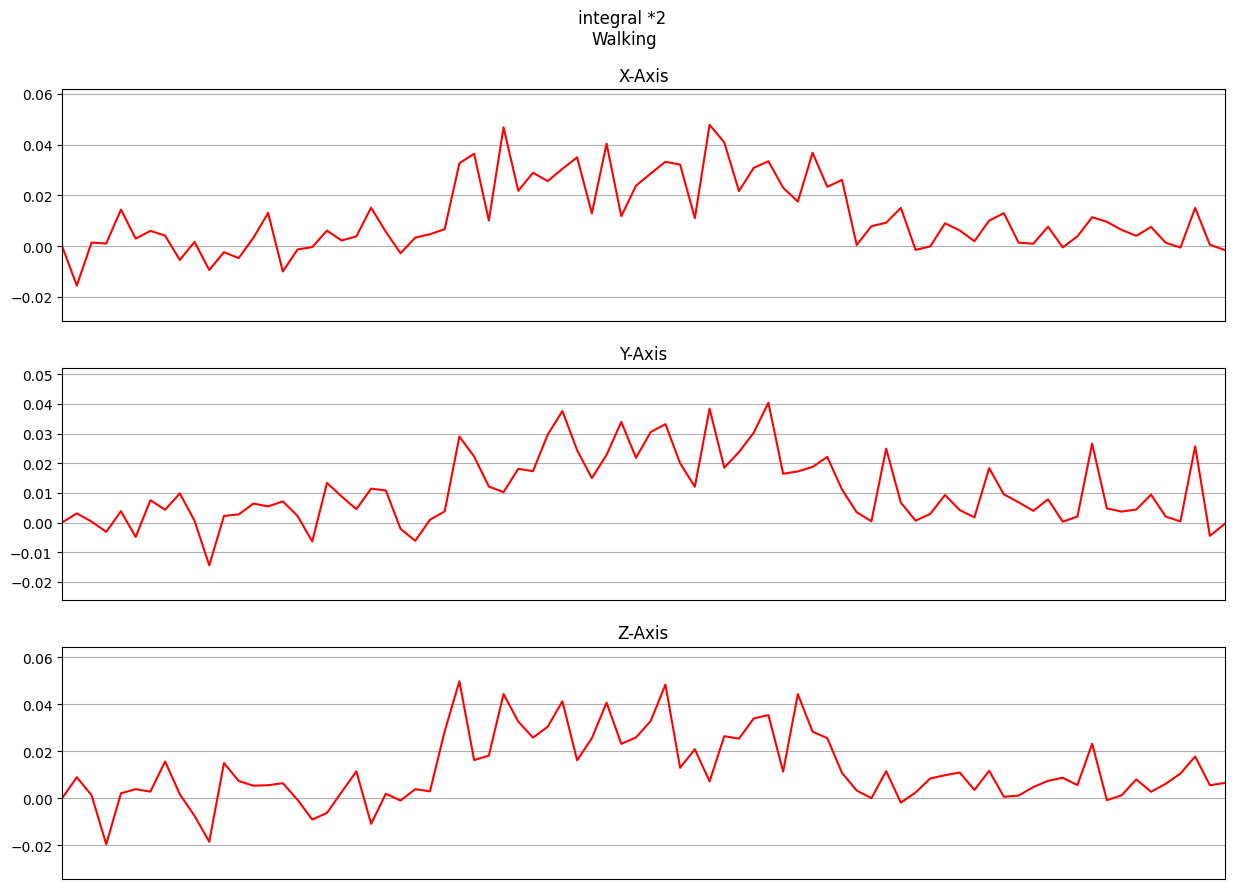

In [25]:
plot_activity(f"integral *2 \n{LABELS[np.argmax(y_train[idx])]}", integral(integral(x_train[idx])))